# Email Spam Detection with Machine Learning

### Problem Statement

<p> We've all been recipient of spam emails before. Spam mail or junk mail, is a type of mail that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.</p>
<p>This project will use Python to build an email spam detector, then use machine learning to train the spam detector to train and classify emails into spam and non-spam.</p>
<p> The original dataset used for this project can be gotten from <a href="https://www.canva.com/link?target=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fuciml%2Fsms-spam-collection-dataset&design=DAFSZMvBiCI&accessRole=viewer&linkSource=document">Kaggle</a></p>

### Data

In [1]:
# import all the tools that will be needed

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
sns.set_theme(color_codes=True)
# To visualize the plottings inside the notebook
%matplotlib inline 

# Label encoding
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.tree import DecisionTreeClassifier

# Model Evaluators
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
mail=pd.read_csv("spam.csv", encoding = 'latin-1', delimiter=',') #  encoding =  'ISO-8859-1' can also be used.
mail.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


### Exploratory Data Analysis

In [3]:
mail.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
mail_df = mail.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [5]:
mail_df1 = mail_df.rename(columns = {'v1':'target', 'v2': 'mail'})
mail_df1.head()

,target,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mail_df1['text length'] = mail_df1['mail'].apply(lambda x:len(x.split(' ')))
mail_df1.head()

,target,mail,text length
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [7]:
mail_df1['character length'] = mail_df1['mail'].apply(lambda x:len(x))
mail_df1.head()

,target,mail,text length,character length
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61


In [8]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Engr. Mike
[nltk_data]     Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Engr. Mike
[nltk_data]     Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
mail_df1['sentence'] = mail_df1['mail'].apply(lambda x:len(nltk.sent_tokenize(x)))
mail_df1.head()

,target,mail,text length,character length,sentence
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,2
1,ham,Ok lar... Joking wif u oni...,6,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,2
3,ham,U dun say so early hor... U c already then say...,11,49,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,1


In [11]:
mail_df1.tail()

,target,mail,text length,character length,sentence
5567,spam,This is the 2nd time we have tried 2 contact u...,30,161,4
5568,ham,Will Ì_ b going to esplanade fr home?,8,37,1
5569,ham,"Pity, * was in mood for that. So...any other s...",10,57,2
5570,ham,The guy did some bitching but I acted like i'd...,26,125,1
5571,ham,Rofl. Its true to its name,6,26,2


In [12]:
mail_df1['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

<AxesSubplot:>

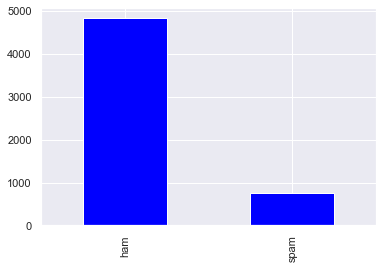

In [13]:
mail_df1['target'].value_counts().plot(kind='bar', colormap='winter')

In [14]:
mail_df1.corr()

,text length,character length,sentence
text length,1.000000,0.974318,0.639835
character length,0.974318,1.000000,0.633082
sentence,0.639835,0.633082,1.000000


In [15]:
le = LabelEncoder()

In [16]:
mail_df1['target'] = le.fit_transform(mail_df1['target'])
print(f"{'target'}:{mail_df1['target'].unique()}")

target:[0 1]


In [17]:
X = mail_df1.drop(['target', 'mail'], axis=1)
X.head()

,text length,character length,sentence
0,20,111,2
1,6,29,2
2,28,155,2
3,11,49,1
4,13,61,1


In [18]:
y = mail_df1['target']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

### Modeling

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
pred = dtree.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       965
           1       0.72      0.68      0.70       150

    accuracy                           0.92      1115
   macro avg       0.84      0.82      0.83      1115
weighted avg       0.92      0.92      0.92      1115



[[926  39]
 [ 48 102]]


In [26]:
print(f'Accuracy Score: {round(accuracy_score(y_test, pred)*100,2)}%\n')

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'MSE is {mse}')
print(f'RMSE is {rmse}')
print(f'R2 Score is {r2}')
print(f'MAE is {mae}')

Accuracy Score: 92.2%

MSE is 0.07802690582959641
RMSE is 0.2793329658840797
R2 Score is 0.3298445595854924
MAE is 0.07802690582959641


## Feature Importance

In [27]:
# to know which of the features that has the most importance 
# or affecting the model more in making predictions
dtree.feature_importances_ 

array([0.30611062, 0.57860469, 0.11528469])

In [28]:
# creating a function for visualizing the feature importances

def plot_importances(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,'feature_importances': importances})
           .sort_values('feature_importances', ascending=False).reset_index(drop=False))
    
    # ploting the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x='feature_importances', y='features', data = df[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importances')
    plt.title('Feature Importance (DecisionTreeClassifier)', fontsize=16)

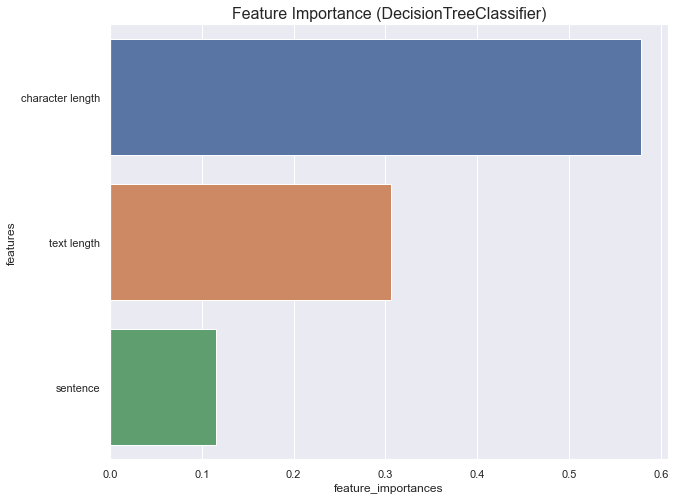

In [29]:
plot_importances(X_train.columns, dtree.feature_importances_)

In [30]:
# export to a pickle file
import pickle
with open('email.pickle', 'wb') as f:
    pickle.dump(dtree,f)

In [31]:
# create a json file to store your columns
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("email_columns.json", "w") as f:
    f.write(json.dumps(columns))

### Thank you